<a href="https://colab.research.google.com/github/OleSpooky/README/blob/main/Hyper_sovereignty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Sparse 4D Hyper-Sovereignty Simulation with Compass...
[t=0] p=0.06, risk=1.44, cg=0.00, ec=0.15, score=-0.17, acted=False
[t=5] p=0.13, risk=1.44, cg=0.00, ec=0.34, score=-0.36, acted=False
[t=10] p=0.28, risk=1.44, cg=0.00, ec=0.32, score=-0.34, acted=False
[t=15] p=0.27, risk=1.44, cg=0.00, ec=0.31, score=-0.33, acted=False
[t=20] p=0.30, risk=1.44, cg=0.00, ec=0.30, score=-0.32, acted=False
[t=25] p=0.18, risk=1.44, cg=0.00, ec=0.29, score=-0.31, acted=False
[t=30] p=0.39, risk=1.44, cg=0.00, ec=0.27, score=-0.30, acted=False
[t=35] p=0.48, risk=1.44, cg=0.00, ec=0.27, score=-0.29, acted=False
[t=40] p=0.52, risk=1.44, cg=0.00, ec=0.26, score=-0.28, acted=False
[t=45] p=0.60, risk=1.44, cg=0.00, ec=0.26, score=-0.28, acted=False
[t=50] p=0.62, risk=1.44, cg=0.00, ec=0.25, score=-0.27, acted=False
[t=55] p=0.65, risk=1.44, cg=0.00, ec=0.24, score=-0.26, acted=False
Simulation complete.


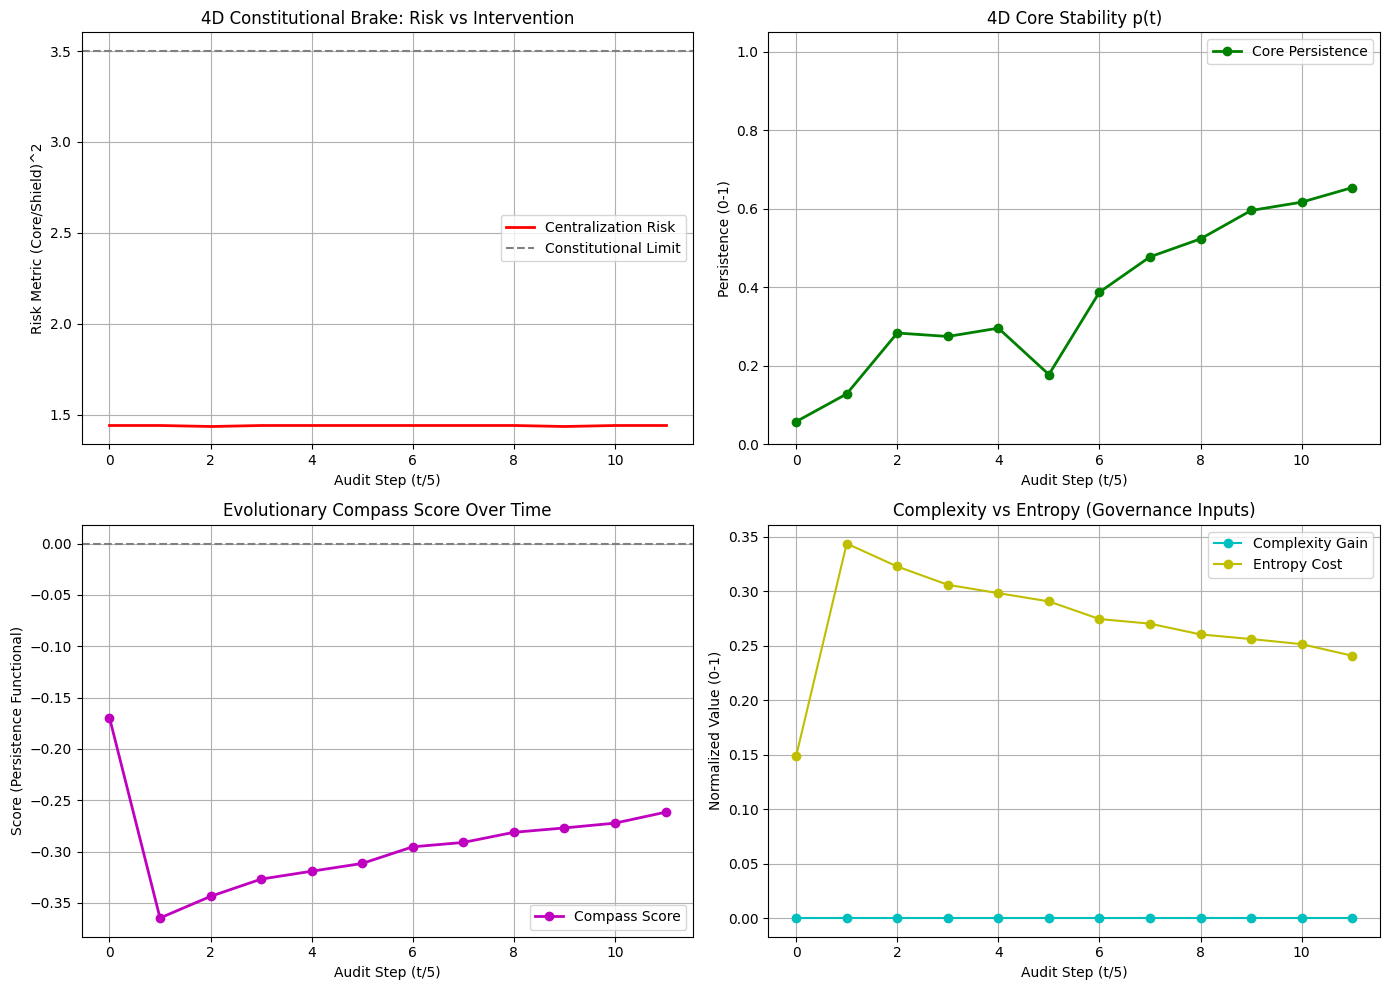

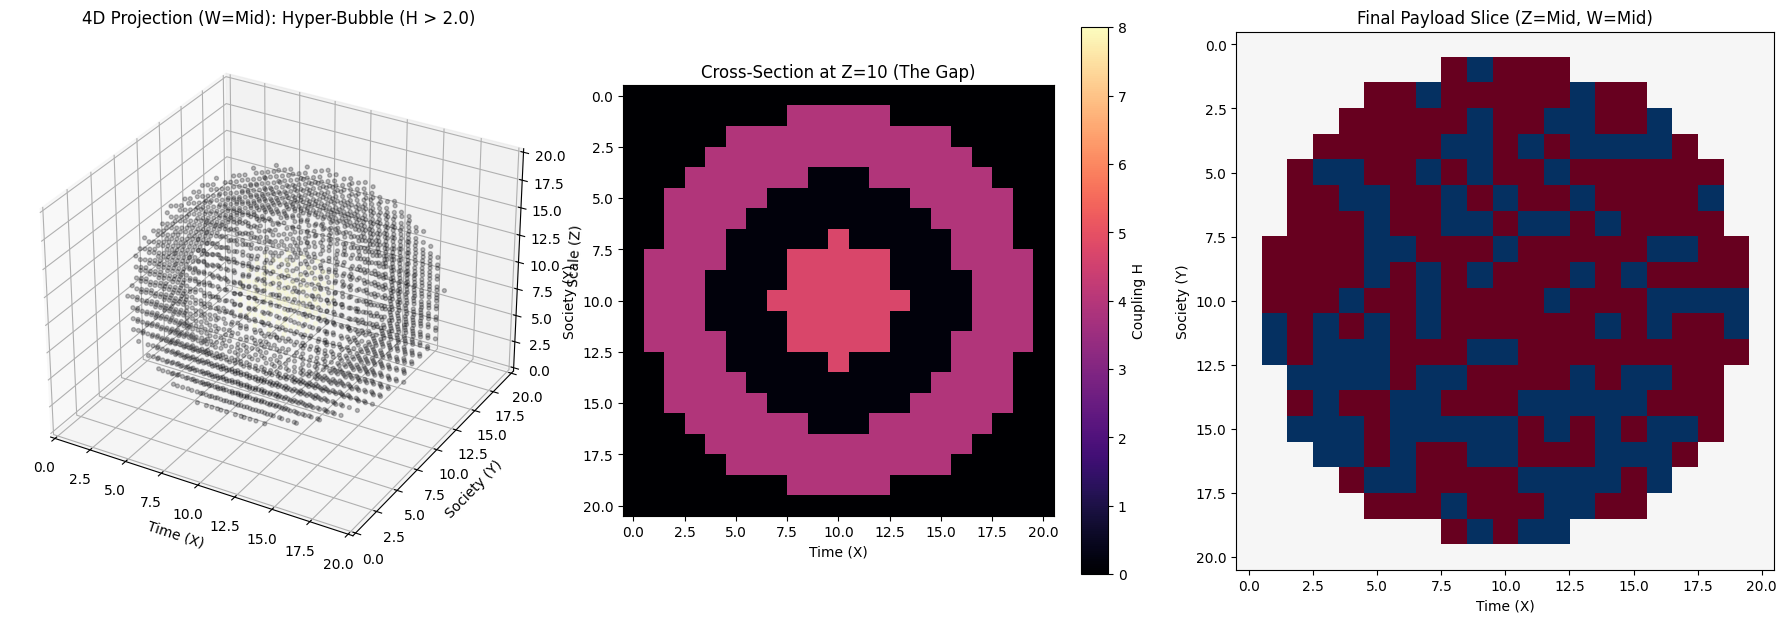

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =========================================================
# 0. Governance Kernel: Evolutionary Compass
# =========================================================

class EvolutionaryCompass:
    def __init__(self, current_step=100):
        """
        Governance state.
        Step 100 = Baseline Civilization
        Step >100 = Forward evolution
        Step <100 = Regression
        """
        self.current_step = current_step
        self.history = [current_step]
        self.score_history = []

    def fractal_audit(self, proposal_name, metrics):
        """
        Persistence = Complexity - (Entropy + Centralization^2)
        Centralization is squared because it creates a single point of failure.
        metrics:
          - complexity_gain (0-1)
          - entropy_cost (0-1)
          - centralization_risk (0-1)
        """
        cg = metrics['complexity_gain']
        ec = metrics['entropy_cost']
        cr = metrics['centralization_risk']

        score = cg - (ec + cr**2)

        if score > 0:
            self.current_step += 1
        else:
            self.current_step -= 1

        self.history.append(self.current_step)
        self.score_history.append(score)
        return score

# =========================================================
# 1. Sparse 4D Hyper-Bubble Geometry
# =========================================================

def build_sparse_hyperbubble(N):
    """
    Build sparse index lists for a 4D Fresnel hyper-bubble:
      - Core: high H (payload)
      - Gap: low H (quench)
      - Shield: high H (defense)
    """
    center = N // 2
    w, z, y, x = np.ogrid[:N, :N, :N, :N]
    dist = np.sqrt((x-center)**2 + (y-center)**2 + (z-center)**2 + (w-center)**2)

    core_mask   = dist < (N * 0.15)
    gap_mask    = (dist >= (N * 0.15)) & (dist < (N * 0.30))
    shield_mask = (dist >= (N * 0.30)) & (dist < (N * 0.45))

    core_idx   = np.argwhere(core_mask)
    gap_idx    = np.argwhere(gap_mask)
    shield_idx = np.argwhere(shield_mask)

    return core_idx, gap_idx, shield_idx

def init_sparse_fields(core_idx, gap_idx, shield_idx):
    """
    Initialize sparse H and x as dictionaries keyed by 4D index tuples.
    """
    H = {}
    x = {}

    # Core: high coupling
    for idx in core_idx:
        t = tuple(idx)
        H[t] = 6.0
        x[t] = np.random.choice([-1, 1])

    # Shield: strong but slightly weaker
    for idx in shield_idx:
        t = tuple(idx)
        H[t] = 5.0
        x[t] = np.random.choice([-1, 1])

    # Gap: low coupling vacuum
    for idx in gap_idx:
        t = tuple(idx)
        H[t] = 0.2
        x[t] = np.random.choice([-1, 1])

    return H, x

# =========================================================
# 2. Sparse 4D Physics Engine
# =========================================================

def sparse_neighbors(idx):
    """
    8-neighbor grid in 4D (±W, ±Z, ±Y, ±X).
    """
    w, z, y, x = idx
    shifts = [
        (1,0,0,0), (-1,0,0,0),
        (0,1,0,0), (0,-1,0,0),
        (0,0,1,0), (0,0,-1,0),
        (0,0,0,1), (0,0,0,-1),
    ]
    for dw, dz, dy, dx in shifts:
        yield (w+dw, z+dz, y+dy, x+dx)

def compute_force(idx, x, H):
    """
    Local interaction force from neighbors that exist in the sparse structure.
    """
    force = 0.0
    for n_idx in sparse_neighbors(idx):
        if n_idx in x:
            J = 0.5 * (H[idx] + H[n_idx])
            force += J * x[n_idx]
    return force

def evolve_sparse(x, H, beta, idx_list, async_rate=0.3):
    """
    One Glauber-like update step on the sparse index set.
    """
    new_x = x.copy()
    for idx_arr in idx_list:
        idx = tuple(idx_arr)
        if idx not in x:
            continue
        if np.random.rand() > async_rate:
            continue
        force = compute_force(idx, x, H)
        p_flip = 1.0 / (1.0 + np.exp(-2 * beta * force))
        if np.random.rand() < p_flip:
            new_x[idx] *= -1
    return new_x

# =========================================================
# 3. Core Persistence in 4D
# =========================================================

def persistence_sparse(x, H, beta, core_idx, tau=5, flip_frac=0.02):
    """
    Measure how well the 4D core heals perturbations.
    """
    core_list = [tuple(i) for i in core_idx]
    x_clean = x.copy()
    x_pert  = x.copy()

    # Flip a fraction of core spins
    n_flips = max(1, int(len(core_list) * flip_frac))
    flip_choices = np.random.choice(len(core_list), n_flips, replace=False)
    for i in flip_choices:
        idx = core_list[i]
        x_pert[idx] *= -1

    dist_accum = 0.0

    for _ in range(tau):
        x_clean = evolve_sparse(x_clean, H, beta, core_idx)
        x_pert  = evolve_sparse(x_pert,  H, beta, core_idx)
        diff = sum(x_clean[idx] != x_pert[idx] for idx in core_list)
        dist_accum += diff / len(core_list)

    avg_dist = dist_accum / tau
    p = max(1.0 - avg_dist * 3.0, 0.0)
    return p

# =========================================================
# 4. Hebbian Geometry Update (Sparse)
# =========================================================

def hebbian_sparse(x, H, p, k_factor, idx_list, eta=0.04, decay=0.004):
    """
    Hebbian-like update over sparse indices.
    """
    new_H = H.copy()
    for idx_arr in idx_list:
        idx = tuple(idx_arr)
        if idx not in H or idx not in x:
            continue
        force = compute_force(idx, x, H)
        corr = np.tanh(x[idx] * force)
        delta = eta * (corr * p * k_factor) - decay * H[idx]
        new_H[idx] = float(np.clip(H[idx] + delta, 0.1, 8.0))
    return new_H

# =========================================================
# 5. Constitutional Brake in 4D
# =========================================================

def governance_brake(H, core_idx, shield_idx, threshold=3.5):
    """
    Audits Core/Shield imbalance in 4D and redistributes coupling if needed.
    Risk = (H_core / H_shield)^2
    """
    core_vals   = [H[tuple(i)] for i in core_idx   if tuple(i) in H]
    shield_vals = [H[tuple(i)] for i in shield_idx if tuple(i) in H]
    if len(core_vals) == 0 or len(shield_vals) == 0:
        return H, 0.0, False

    h_core   = np.mean(core_vals)
    h_shield = np.mean(shield_vals)
    if h_shield < 0.1:
        h_shield = 0.1

    risk = (h_core / h_shield)**2
    acted = False

    if risk > threshold:
        acted = True
        # Dampen core
        for i in core_idx:
            t = tuple(i)
            if t in H:
                H[t] *= 0.85
        # Strengthen shield
        for i in shield_idx:
            t = tuple(i)
            if t in H:
                H[t] *= 1.15

    return H, risk, acted

# =========================================================
# 6. Governance Decay When Compass Rejects
# =========================================================

def apply_governance_decay(H, rate=0.02):
    """
    Gentle global decay when Compass rejects a proposal.
    Simulates structural fatigue / veto.
    """
    new_H = {}
    for idx, val in H.items():
        new_H[idx] = float(max(0.1, val * (1.0 - rate)))
    return new_H

# =========================================================
# 7. Utility: Build 3D Slice for Visualization (W = mid)
# =========================================================

def build_3d_slice_from_sparse(H, N, fixed_w):
    """
    Build a dense 3D array H_3d[w_fixed, z,y,x] for visualization.
    """
    H_3d = np.zeros((N, N, N))
    for (w,z,y,x), val in H.items():
        if w == fixed_w:
            if 0 <= z < N and 0 <= y < N and 0 <= x < N:
                H_3d[z,y,x] = val
    return H_3d

def build_3d_spin_slice_from_sparse(x, N, fixed_w):
    X_3d = np.zeros((N, N, N))
    for (w,z,y,x_idx), val in x.items():
        if w == fixed_w:
            if 0 <= z < N and 0 <= y < N and 0 <= x_idx < N:
                X_3d[z,y,x_idx] = val
    return X_3d

# =========================================================
# 8. Main Simulation: Hyper-Sovereignty + Compass
# =========================================================

N = 21          # 4D side length (small for feasibility)
T = 60          # total steps
beta = 1.8      # inverse temperature
k_factor = 0.8  # curvature weight (tunable)

core_idx, gap_idx, shield_idx = build_sparse_hyperbubble(N)
idx_all = np.vstack([core_idx, gap_idx, shield_idx])
H, x = init_sparse_fields(core_idx, gap_idx, shield_idx)

# Governance and histories
compass = EvolutionaryCompass(current_step=105)

p_history = []
risk_history = []
complexity_history = []
entropy_history = []
score_history = []
interventions = []

prev_mean_H = np.mean(list(H.values()))
prev_x_snapshot = x.copy()

print("Running Sparse 4D Hyper-Sovereignty Simulation with Compass...")

for t in range(T):
    # 1. Physics: spin evolution on core+shield+gap
    x = evolve_sparse(x, H, beta, idx_all)

    # 2. Every few steps: measure, govern, learn
    if t % 5 == 0:
        # Persistence in the 4D core
        p = persistence_sparse(x, H, beta, core_idx, tau=4, flip_frac=0.02)

        # --- Metrics for Compass ---

        # Complexity gain: change in mean H
        mean_H = np.mean(list(H.values()))
        complexity_gain = max(0.0, min(1.0, (mean_H - prev_mean_H) / 2.0))  # scaled

        # Entropy cost: fraction of spins that changed since last audit
        changed = 0
        total   = 0
        for idx_key in x.keys():
            if idx_key in prev_x_snapshot:
                total += 1
                if x[idx_key] != prev_x_snapshot[idx_key]:
                    changed += 1
        entropy_cost = (changed / total) if total > 0 else 0.0
        entropy_cost = max(0.0, min(1.0, entropy_cost))

        # Constitutional brake: compute risk & possibly intervene
        H, risk, acted = governance_brake(H, core_idx, shield_idx, threshold=3.5)

        # Centralization risk normalized to [0,1] for Compass
        centralization_risk = min(1.0, risk / 10.0)  # heuristic scaling

        metrics = {
            'complexity_gain'    : complexity_gain,
            'entropy_cost'       : entropy_cost,
            'centralization_risk': centralization_risk
        }

        # Compass decision
        score = compass.fractal_audit("4D Bubble Evolution", metrics)

        # If Compass approves, we allow Hebbian strengthening;
        # if not, we apply governance decay.
        if score > 0:
            H = hebbian_sparse(x, H, p, k_factor, idx_all, eta=0.04, decay=0.004)
        else:
            H = apply_governance_decay(H, rate=0.02)

        # Logging
        p_history.append(p)
        risk_history.append(risk)
        complexity_history.append(complexity_gain)
        entropy_history.append(entropy_cost)
        score_history.append(score)
        if acted:
            interventions.append(len(p_history)-1)

        # Update baselines for next audit
        prev_mean_H = mean_H
        prev_x_snapshot = x.copy()

        print(f"[t={t}] p={p:.2f}, risk={risk:.2f}, "
              f"cg={complexity_gain:.2f}, ec={entropy_cost:.2f}, "
              f"score={score:.2f}, acted={acted}")

print("Simulation complete.")

# =========================================================
# 9. Visualization: Governance + Stability
# =========================================================

audit_steps = np.arange(len(p_history))

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# (a) Risk vs Constitutional Limit
axes[0,0].plot(audit_steps, risk_history, 'r-', linewidth=2, label='Centralization Risk')
axes[0,0].axhline(y=3.5, color='gray', linestyle='--', label='Constitutional Limit')
if interventions:
    axes[0,0].plot(
        interventions,
        [risk_history[i] for i in interventions],
        'kX', markersize=10, label='Brake Applied'
    )
axes[0,0].set_title("4D Constitutional Brake: Risk vs Intervention")
axes[0,0].set_xlabel("Audit Step (t/5)")
axes[0,0].set_ylabel("Risk Metric (Core/Shield)^2")
axes[0,0].grid(True)
axes[0,0].legend()

# (b) Core Persistence
axes[0,1].plot(audit_steps, p_history, 'g-o', linewidth=2, label='Core Persistence')
axes[0,1].set_title("4D Core Stability p(t)")
axes[0,1].set_xlabel("Audit Step (t/5)")
axes[0,1].set_ylabel("Persistence (0-1)")
axes[0,1].set_ylim(0, 1.05)
axes[0,1].grid(True)
axes[0,1].legend()

# (c) Compass Score
axes[1,0].plot(audit_steps, score_history, 'm-o', linewidth=2, label='Compass Score')
axes[1,0].axhline(y=0, color='gray', linestyle='--')
axes[1,0].set_title("Evolutionary Compass Score Over Time")
axes[1,0].set_xlabel("Audit Step (t/5)")
axes[1,0].set_ylabel("Score (Persistence Functional)")
axes[1,0].grid(True)
axes[1,0].legend()

# (d) Complexity vs Entropy
axes[1,1].plot(audit_steps, complexity_history, 'c-o', label='Complexity Gain')
axes[1,1].plot(audit_steps, entropy_history, 'y-o', label='Entropy Cost')
axes[1,1].set_title("Complexity vs Entropy (Governance Inputs)")
axes[1,1].set_xlabel("Audit Step (t/5)")
axes[1,1].set_ylabel("Normalized Value (0-1)")
axes[1,1].grid(True)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# =========================================================
# 10. 3D Projection (W = mid) and Final Geometry/State
# =========================================================

fixed_w = N // 2
H_3d = build_3d_slice_from_sparse(H, N, fixed_w)
X_3d = build_3d_spin_slice_from_sparse(x, N, fixed_w)

fig = plt.figure(figsize=(18,6))

# 3D scatter of H>2.0
ax1 = fig.add_subplot(1,3,1, projection='3d')
z_grid, y_grid, x_grid = np.indices((N, N, N))
mask = H_3d > 2.0
ax1.scatter(x_grid[mask], y_grid[mask], z_grid[mask],
            c=H_3d[mask], cmap='magma', alpha=0.25, s=8)
ax1.set_title("4D Projection (W=Mid): Hyper-Bubble (H > 2.0)")
ax1.set_xlabel("Time (X)")
ax1.set_ylabel("Society (Y)")
ax1.set_zlabel("Scale (Z)")

# 2D heatmap cross-section (Z = mid)
mid_z = N // 2
ax2 = fig.add_subplot(1,3,2)
im2 = ax2.imshow(H_3d[mid_z], cmap='magma', vmin=0, vmax=8)
ax2.set_title(f"Cross-Section at Z={mid_z} (The Gap)")
ax2.set_xlabel("Time (X)")
ax2.set_ylabel("Society (Y)")
plt.colorbar(im2, ax=ax2, label="Coupling H")

# 2D payload slice (spins at W=mid, Z=mid)
ax3 = fig.add_subplot(1,3,3)
im3 = ax3.imshow(X_3d[mid_z], cmap='RdBu', interpolation='nearest')
ax3.set_title("Final Payload Slice (Z=Mid, W=Mid)")
ax3.set_xlabel("Time (X)")
ax3.set_ylabel("Society (Y)")

plt.tight_layout()
plt.show()